In [1]:
import pandas as pd

Accuracy on rbot

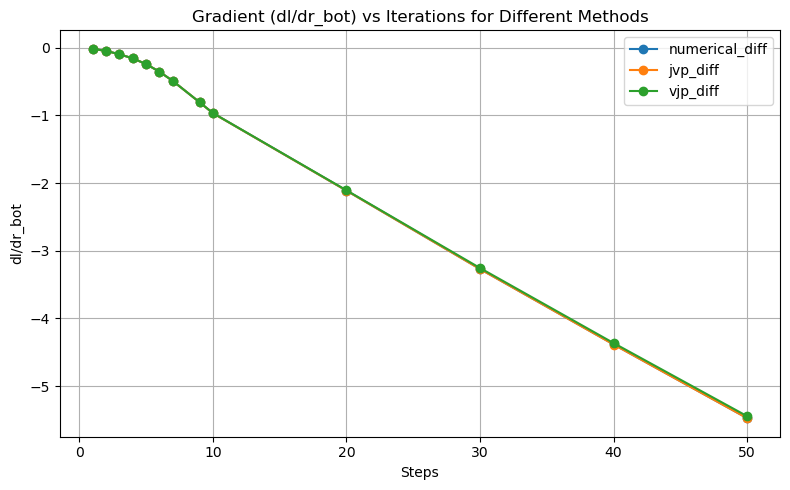

In [8]:
# Read the CSV file
df = pd.read_csv('../scripts/gradients_vs_iterations.csv')

# Plot
plt.figure(figsize=(8, 5))
for method in df['method'].unique():
    method_df = df[df['method'] == method]
    plt.plot(method_df['iteration'], method_df['gradient'], marker='o', label=method)

plt.xlabel('Steps')
plt.ylabel('dl/dr_bot')
plt.title('Gradient (dl/dr_bot) vs Iterations for Different Methods')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

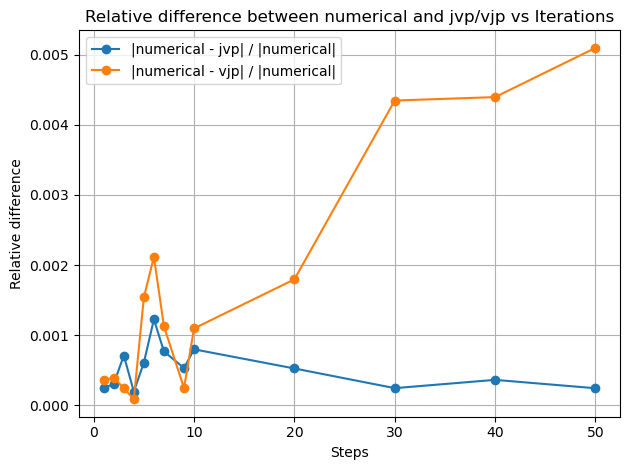

In [13]:
# Pivot the DataFrame for easier comparison
pivot = df.pivot(index='iteration', columns='method', values='gradient')

# Compute absolute differences
if 'numerical_diff' in pivot.columns:
    if 'jvp_diff' in pivot.columns:
        abs_diff_jvp = (pivot['numerical_diff'] - pivot['jvp_diff']).abs() / (pivot['numerical_diff']).abs()
        plt.plot(pivot.index, abs_diff_jvp, marker='o', label='|numerical - jvp| / |numerical|')
    if 'vjp_diff' in pivot.columns:
        abs_diff_vjp = (pivot['numerical_diff'] - pivot['vjp_diff']).abs() / (pivot['numerical_diff']).abs()
        plt.plot(pivot.index, abs_diff_vjp, marker='o', label='|numerical - vjp| / |numerical|')

plt.xlabel('Steps')
plt.ylabel('Relative difference')
plt.title('Relative difference between numerical and jvp/vjp vs Iterations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()